# Descrição do Experimento

Algoritmo Genético utilizando representação binária do cromossomo. O valor zero representa que o vértice não participa da solução e o valor um, por outro lado, participa.

O tamanho do cromossomo é igual ao número de vértices não obrigatórios da instância do problema considerada (dataset), ou seja, é igual o número total de vértices subtraido a quantidade de vértices terminais.

Operação de cruzamento baseada em dois pontos de corte escolhidos aleatoriamente para cada chamada do método.
Foi utilizada a operação de mutação *bit flip*.

Para todas as instâncias do problema foram utilizados os parâmetros:

    - Nro. de execuções = 5
    - Tamanho população = 10
    - Nro máximo de iterações = 10.000
    - Taxa de cruzamento = 0.85
    - Taxa de mutação = 0.2
    - Critério de parada: atingir o número máximo de iterações.
   
    - A inicialização da população é puramente aleatória.

O código da simulação pode ser obtido no seguinte [*commit*](https://github.com/GiliardGodoi/ppgi-steiner-tree-gpx/tree/df8b69b207c824aefa6c4e603ebb9e83b12903e4)

As instâncias consideradas se referem aos da classe B (steinb1.txt ... steinb18.txt) da OR-Library.

## Conclusão

O AG encontrou o ótimo global para as instâncias dos problemas considerados. Para a grande maioria das instâncias encontrou o ótimo global em todas as execuções.

O gráfico de barras da célula [7] mostra esse resultado. Apenas para as instâncias B11, B14, B15, B16 e B18, não encontrou o ótimo global em todas as execuções.

O tempo de execução foi em torno de 3 a 4 minutos para cada tentativa. 

In [1]:
# CONFIGURAÇÕES INICIAIS DO NOTEBOOK
import os

# Importando bibliotecas para análise de dados
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
MAIN_FOLDER = os.path.join("..", "outputdata", "KAPSALIS_RANDOM")

DATA_FOLDERS = [f'B{i}' for i in range(1,19)]

os.path.exists(MAIN_FOLDER)

True

In [3]:
# base_filename = 'simulation.csv'
# datafolder = DATA_FOLDERS[16]

# DATA = list()

# for i in range(1,6):
#     filename = os.path.join(MAIN_FOLDER,
#                             datafolder ,
#                             f'{i}_{base_filename}')
#     print(filename)
#     DATA.append(pd.read_csv(filename))


# dfData = pd.concat(DATA, ignore_index=True)

In [4]:
base_filename = 'simulation.csv'
datafolder = DATA_FOLDERS[0]

DATA = list()
for datafolder in DATA_FOLDERS:
    for i in range(1,6):
        filename = os.path.join(MAIN_FOLDER,
                                datafolder ,
                                f'{i}_{base_filename}')
#         print(filename)
        DATA.append(pd.read_csv(filename))

dfData = pd.concat(DATA, ignore_index=True)

In [5]:
dfData.head()

,trial,instance_Problem,nro_nodes,nro_edges,nro_terminals,tx_crossover,tx_mutation,best_cost,best_fitness,population_size,generation
0,1,B1,50,63,9,0.85,0.2,82,107,10,10000
1,2,B1,50,63,9,0.85,0.2,82,185,10,10000
2,3,B1,50,63,9,0.85,0.2,82,101,10,10000
3,4,B1,50,63,9,0.85,0.2,82,13,10,10000
4,5,B1,50,63,9,0.85,0.2,82,4,10,10000


In [6]:
# fig = plt.figure(figsize=(20, 10))

# sns.boxplot(x="best_cost", 
#             y="instance_Problem",
#             data=dfData,
#             palette="vlag",
#            )

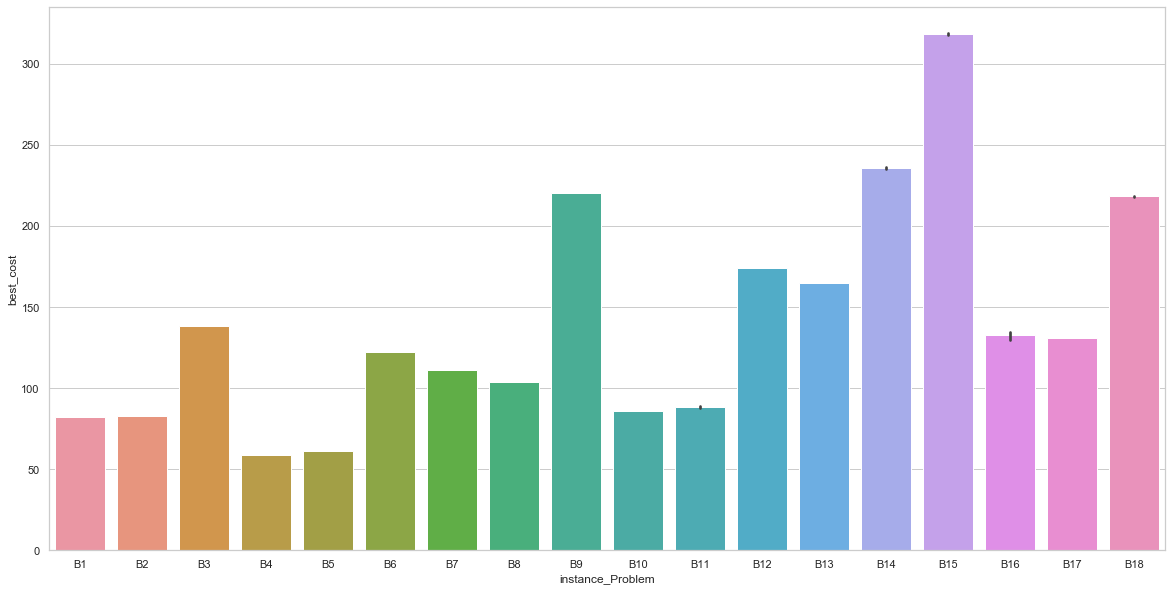

In [7]:
fig = plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

sns.barplot(x="instance_Problem",
            y="best_cost",
            data=dfData,
           )

In [8]:
df = dfData[['instance_Problem', 'best_cost']].groupby(['instance_Problem']).describe()

df

best_cost                                                    
                     count   mean       std    min    25%    50%    75%    max
instance_Problem                                                              
B1                     5.0   82.0  0.000000   82.0   82.0   82.0   82.0   82.0
B10                    5.0   86.0  0.000000   86.0   86.0   86.0   86.0   86.0
B11                    5.0   88.4  0.894427   88.0   88.0   88.0   88.0   90.0
B12                    5.0  174.0  0.000000  174.0  174.0  174.0  174.0  174.0
B13                    5.0  165.0  0.000000  165.0  165.0  165.0  165.0  165.0
B14                    5.0  236.0  0.707107  235.0  236.0  236.0  236.0  237.0
B15                    5.0  318.4  0.894427  318.0  318.0  318.0  318.0  320.0
B16                    5.0  132.6  3.435113  127.0  132.0  134.0  134.0  136.0
B17                    5.0  131.0  0.000000  131.0  131.0  131.0  131.0  131.0
B18                    5.0  218.2  0.447214  218.0  218.0  218.0  218.0  219.0
B2                     5.0   83.0  0.000000   83.0   83.0   83.0   83.0   83.0
B3                     5.0  138.0  0.000000  138.0  138.0  138.0  138.0  138.0
B4                     5.0   59.0  0.000000   59.0   59.0   59.0   59.0   59.0
B5                     5.0   61.0  0.000000   61.0   61.0   61.0   61.0   61.0
B6                     5.0  122.0  0.000000  122.0  122.0  122.0  122.0  122.0
B7                     5.0  111.0  0.000000  111.0  111.0  111.0  111.0  111.0
B8                     5.0  104.0  0.000000  104.0  104.0  104.0  104.0  104.0
B9                     5.0  220.0  0.000000  220.0  220.0  220.0  220.0  220.0

In [9]:
dfData['count'] = 0
df = dfData[['instance_Problem', 'best_cost', 'count']].groupby(['instance_Problem', 'best_cost']).count()

df

count
instance_Problem best_cost       
B1               82             5
B10              86             5
B11              88             4
                 90             1
B12              174            5
B13              165            5
B14              235            1
                 236            3
                 237            1
B15              318            4
                 320            1
B16              127            1
                 132            1
                 134            2
                 136            1
B17              131            5
B18              218            4
                 219            1
B2               83             5
B3               138            5
B4               59             5
B5               61             5
B6               122            5
B7               111            5
B8               104            5
B9               220            5

In [10]:
# df.to_clipboard()